# USING SIMPLE WEATHER DATASET

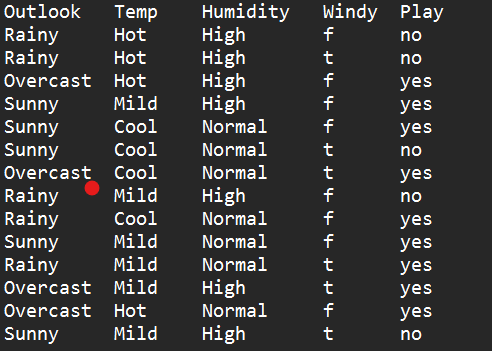

In [49]:
import numpy as np 
import pandas as pd 	
import matplotlib.pyplot as plt 
import math


def accuracy_score(y_true, y_pred):

	"""	score = (y_true - y_pred) / len(y_true) """

	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100*10 ,2)

def pre_processing(df):

	""" partioning data into features and target """

	X = df.drop([df.columns[-1]], axis = 1)
	y = df[df.columns[-1]]

	return X, y



class  NaiveBayes:

	"""
		Bayes Theorem:
										Likelihood * Class prior probability
				Posterior Probability = -------------------------------------
											Predictor prior probability
				
							  			 P(x|c) * p(c)
							   P(c|x) = ------------------ 
											  P(x)
	"""

	def __init__(self):

		"""
			Attributes:
				likelihoods: Likelihood of each feature per class
				class_priors: Prior probabilities of classes 
				pred_priors: Prior probabilities of features 
				features: All features of dataset
		"""
		self.features = list
		self.likelihoods = {}
		self.class_priors = {}
		self.pred_priors = {}

		self.X_train = np.array
		self.y_train = np.array
		self.train_size = int
		self.num_feats = int

	def fit(self, X, y):

		self.features = list(X.columns)
		self.X_train = X
		self.y_train = y
		self.train_size = X.shape[0]
		self.num_feats = X.shape[1]

		for feature in self.features:
			self.likelihoods[feature] = {}
			self.pred_priors[feature] = {}

			for feat_val in np.unique(self.X_train[feature]):
				self.pred_priors[feature].update({feat_val: 0})

				for outcome in np.unique(self.y_train):
					self.likelihoods[feature].update({feat_val+'_'+outcome:0})
					self.class_priors.update({outcome: 0})

		self._calc_class_prior()
		self._calc_likelihoods()
		self._calc_predictor_prior()

	def _calc_class_prior(self):

		""" P(c) - Prior Class Probability """

		for outcome in np.unique(self.y_train):
			outcome_count = sum(self.y_train == outcome)
			self.class_priors[outcome] = outcome_count / self.train_size

	def _calc_likelihoods(self):

		""" P(x|c) - Likelihood """

		for feature in self.features:

			for outcome in np.unique(self.y_train):
				outcome_count = sum(self.y_train == outcome)
				feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()

				for feat_val, count in feat_likelihood.items():
					self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count


	def _calc_predictor_prior(self):

		""" P(x) - Evidence """

		for feature in self.features:
			feat_vals = self.X_train[feature].value_counts().to_dict()

			for feat_val, count in feat_vals.items():
				self.pred_priors[feature][feat_val] = count/self.train_size


	def predict(self, X):

		""" Calculates Posterior probability P(c|x) """

		results = []
		X = np.array(X)

		for query in X:
			probs_outcome = {}
			for outcome in np.unique(self.y_train):
				prior = self.class_priors[outcome]
				likelihood = 1
				evidence = 1

				for feat, feat_val in zip(self.features, query):
					likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
					evidence *= self.pred_priors[feat][feat_val]

				posterior = (likelihood * prior) / (evidence)

				probs_outcome[outcome] = posterior

			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			results.append(result)

		return np.array(results)

			

if __name__ == "__main__":

	print("\nWeather Dataset:")

	df = pd.read_table("weather.txt")

	
	X,y  = pre_processing(df)

	nb_clf = NaiveBayes()
	nb_clf.fit(X, y)

	print("Train Accuracy: {}".format(accuracy_score(y, nb_clf.predict(X))))
	query = np.array([['Rainy','Mild', 'Normal', 't']])
	print("Query 1:- {} ---> {}".format(query, nb_clf.predict(query)))
    
	query = np.array([['Overcast','Cool', 'Normal', 't']])
	print("Query 2:- {} ---> {}".format(query, nb_clf.predict(query)))

	query = np.array([['Sunny','Hot', 'High', 't']])
	print("Query 3:- {} ---> {}".format(query, nb_clf.predict(query)))



Weather Dataset:
Train Accuracy: 66.67
Query 1:- [['Rainy' 'Mild' 'Normal' 't']] ---> ['Outlook   Temp    Humidity   Windy  Play']
Query 2:- [['Overcast' 'Cool' 'Normal' 't']] ---> ['Outlook   Temp    Humidity   Windy  Play']
Query 3:- [['Sunny' 'Hot' 'High' 't']] ---> ['Outlook   Temp    Humidity   Windy  Play']
